# Flow Matching

## Basics of normalising flows

In **flow matching**, we try to learn a **vector field** $\pmb{v}(\pmb{x}, t)$ that transports samples along a **probability path** $p(\pmb{x}, t)$ from a source distribution $p(\pmb{x}, 0)$ to the data distribution $p(\pmb{x}, T)$, where each individual sample follows a **flow map** $\pmb{\phi}(\pmb{x}, t)$. These objects are all interelated via the following equations:

- **Flow**: $$\frac{\mathrm{d}\pmb{\phi}(\pmb{x}, t)}{\mathrm{d}t} = \pmb{v}\left(\pmb{\phi}(\pmb{x}, t), t\right) \quad \text{s.t.} \quad \pmb{\phi}(\pmb{x}, 0) = \pmb{x}$$
- **Continuity** $$\frac{\partial p(\pmb{x}, t)}{\partial t} = - \nabla_{\pmb{x}} \cdot \left(p(\pmb{x}, t) \pmb{v}(\pmb{x}, t)\right)$$
- **Pushforward**: $$p(\pmb{x},t) = p\bigl(\pmb{\phi}^{-1}(\pmb{x},t),\,0\bigr)\; \bigl|\det \nabla_{\pmb{x}}\pmb{\phi}^{-1}(\pmb{x},t)\bigr|$$
- **Log likelihood**: $$\frac{\mathrm{d} \log p(\pmb{\phi}(\pmb{x}, t), t)}{\mathrm{d} t} = -\nabla_{\pmb{x}} \cdot  \pmb{v}\left(\pmb{\phi}(\pmb{x}, t), t\right)$$

### Probability paths

Assuming we have samples of a **data distribution** $q(\pmb{x}_1)$, we suppose that we can construct a **marginal probability path** $p(\pmb{x}, t)$
$$
p(\pmb{x}, t) = \int p(\pmb{x}, t \mid \pmb{x}_1) q(\pmb{x}_1) \mathrm{d}\pmb{x}_1
$$
with a **conditional probability path** $p(\pmb{x}, t \mid \pmb{x}_1)$, which we define.

### Vector fields

Due to the continuity equation, there exists a **conditional vector field** $\pmb{v}(\pmb{x}, t \mid \pmb{x}_1)$ that transports samples along $p(\pmb{x}, t \mid \pmb{x}_1)$ – which should be readily obtained if they are simple. Additionally, the definition of the marginal probability path $p(\pmb{x}, t)$ along with the continuity equation implies the existence of a **marginal vector field** $\pmb{v}(\pmb{x}, t)$
$$
\begin{aligned}
\frac{\partial p(\pmb{x}, t)}{\partial t} &= - \nabla_{\pmb{x}} \cdot \left(\pmb{v}(\pmb{x}, t) p(\pmb{x}, t)\right) \\
&= \frac{\partial}{\partial t} \int p(\pmb{x}, t \mid \pmb{x}_1) q(\pmb{x}_1) \mathrm{d}\pmb{x}_1 \\
&= \int \frac{\partial p(\pmb{x}, t \mid \pmb{x}_1)}{\partial t}  q(\pmb{x}_1) \mathrm{d}\pmb{x}_1 \\
&= \int - \nabla_{\pmb{x}} \cdot \left(\pmb{v}(\pmb{x}, t \mid \pmb{x}_1) p(\pmb{x}, t \mid \pmb{x}_1) \right)  q(\pmb{x}_1) \mathrm{d}\pmb{x}_1 \\
&= - \nabla_{\pmb{x}} \cdot \int \pmb{v}(\pmb{x}, t \mid \pmb{x}_1) p(\pmb{x}, t \mid \pmb{x}_1) q(\pmb{x}_1) \mathrm{d}\pmb{x}_1 \\
\implies \pmb{v}(\pmb{x}, t) &= \frac{1}{p(\pmb{x}, t)} \int \pmb{v}(\pmb{x}, t \mid \pmb{x}_1) p(\pmb{x}, t \mid \pmb{x}_1) q(\pmb{x}_1) \mathrm{d}\pmb{x}_1,
\end{aligned}
$$

### Loss function

Ultimately, we want to train a neural-network-parameterised vector field $\pmb{u}(\pmb{x}, t, \theta)$ to match the marginal vector field $\pmb{v}(\pmb{x}, t)$. To do this, we must define a valid [Bregman divergence](https://en.wikipedia.org/wiki/Bregman_divergence) $D(\pmb{u} \parallel \pmb{v})$ and a time density $w(t)$. With these and using the definitions above we can see that matching the conditional vector fields is equivalent:

$$
\begin{aligned}
\nabla_\theta \mathcal{L}(\theta) &= \nabla_\theta \int \int D\left(\pmb{u}(\pmb{x}, t, \theta) \parallel \pmb{v}(\pmb{x}, t)\right) p(\pmb{x}, t) w(t) \mathrm{d}\pmb{x} \mathrm{d}t \\
&=  \int \int \nabla_\theta D\left(\pmb{u}(\pmb{x}, t, \theta) \parallel \pmb{v}(\pmb{x}, t)\right) p(\pmb{x}, t) w(t) \mathrm{d}\pmb{x} \mathrm{d}t \\
&=  \int \int \nabla_{\pmb{u}} D\left(\pmb{u}(\pmb{x}, t, \theta) \parallel \pmb{v}(\pmb{x}, t)\right) \nabla_\theta \pmb{u}(\pmb{x}, t, \theta)  p(\pmb{x}, t) w(t) \mathrm{d}\pmb{x} \mathrm{d}t \\
&=  \int \int \nabla_{\pmb{u}} D\left(\pmb{u}(\pmb{x}, t, \theta) \parallel \frac{1}{p(\pmb{x}, t)} \int \pmb{v}(\pmb{x}, t \mid \pmb{x}_1) p(\pmb{x}, t \mid \pmb{x}_1) q(\pmb{x}_1) \mathrm{d}\pmb{x}_1\right) \nabla_\theta \pmb{u}(\pmb{x}, t, \theta)  p(\pmb{x}, t) w(t) \mathrm{d}\pmb{x} \mathrm{d}t \\
&=  \int \int \int \nabla_{\pmb{u}} D\left(\pmb{u}(\pmb{x}, t, \theta) \parallel \pmb{v}(\pmb{x}, t \mid \pmb{x}_1) \right) \nabla_\theta \pmb{u}(\pmb{x}, t, \theta) p(\pmb{x}, t \mid \pmb{x}_1) q(\pmb{x}_1)  w(t)  \mathrm{d}\pmb{x} \mathrm{d}\pmb{x}_1 \mathrm{d}t \\
&=  \nabla_\theta  \int \int \int D\left(\pmb{u}(\pmb{x}, t, \theta) \parallel \pmb{v}(\pmb{x}, t \mid \pmb{x}_1) \right) p(\pmb{x}, t \mid \pmb{x}_1) q(\pmb{x}_1)  w(t)  \mathrm{d}\pmb{x} \mathrm{d}\pmb{x}_1 \mathrm{d}t \\
&= \nabla_\theta \mathbb{E}_{(t, \pmb{x}_1, \pmb{x}) \sim \pi} \left[ D\left(\pmb{u}(\pmb{x}, t, \theta) \parallel \pmb{v}(\pmb{x}, t \mid \pmb{x}_1)\right) \right] \quad \text{s.t.} \quad \pi(t, \pmb{x}_1, \pmb{x}) = w(t) p(\pmb{x}, t \mid \pmb{x}_1) q(\pmb{x}_1) 
\end{aligned}
$$

A popular choice of Bregman divergence is  $D(\pmb{u} \parallel \pmb{v}) = \lVert \pmb{u} - \pmb{v} \rVert^2$. Another choice could be, e.g., a [Mahalanobis distance](https://en.wikipedia.org/wiki/Mahalanobis_distance) $D(\pmb{u} \parallel \pmb{v}) = (\pmb{u} - \pmb{v})^\top \pmb{A} (\pmb{u} - \pmb{v})$ with $\pmb{A}$ positive definite. A popular choice of time distribution is $w(t) = \mathcal{U}[0, T]$.

### Generation

Once the above loss is minimised, the neural-network-parameterised vector field $\pmb{u}(\pmb{x}, t, \theta)$ can **generate** samples via numerical integration of the flow equation
$$
\frac{\mathrm{d} \pmb{\phi}(\pmb{x}, t, \theta)}{\mathrm{d} t} = \pmb{u}(\pmb{\phi}(\pmb{x}, t, \theta), t, \theta) \quad \text{s.t.} \quad \pmb{\phi}(\pmb{x}, 0, \theta) = \pmb{x} \sim p(\pmb{x}, 0)
$$
from $t=0$ to $t=T$.

### Likelihood

To compute the likelihood of a test point $\pmb{x}_1$ under the model, we must numerically integrate the log likelihood equation in reverse from $\pmb{x}_1$ at $t=T$ to $t=0$. Equivalently, we can integrate
$$
\frac{\mathrm{d}}{\mathrm{d} t} \begin{bmatrix} \pmb{f}(t) \\ \pmb{g}(t)\end{bmatrix} =
\begin{bmatrix} -\pmb{u}(\pmb{f}(t), T - t, \theta) \\ \nabla_{\pmb{x}} \cdot \pmb{u}(\pmb{f}(t), T - t, \theta) \end{bmatrix}
\quad \text{s.t.} \quad
\begin{bmatrix} \pmb{f}(0) \\ \pmb{g}(0)\end{bmatrix} = \begin{bmatrix} \pmb{x}_1 \\ 0\end{bmatrix}
$$
from $t=0$ to $t=T$ and then compute
$$
\log p(\pmb{x}_1, T, \theta) \approx \log p(f(T), 0) - g(T).
$$

Note that $\nabla_{\pmb{x}} \cdot \pmb{u}(\pmb{x}, t, \theta)$ can be expensive to compute in high dimensions, but Hutchinson's trace estimator together with the Jacobian-vector product can be used to efficiently compute

$$
\nabla_{\pmb{x}} \cdot \pmb{u}(\pmb{x}, t, \theta) = \mathbb{E}_{\pmb{z} \sim \mathcal{N}(\pmb{0}, \pmb{I})} \left[ \pmb{z}^\top \nabla_{\pmb{x}} \pmb{u}(\pmb{x}, t, \theta) \pmb{z} \right]
$$

# Tutorial

In [1]:
import flax.nnx as nnx, jax.numpy as jnp, jax, matplotlib.pyplot as plt, optax
from jax.experimental.ode import odeint
from tqdm import tqdm
from functools import partial
from sklearn import datasets
from typing import Tuple, Callable, Dict, List
import torch, numpy as np, torchvision
from abc import ABC, abstractmethod
from matplotlib.font_manager import FontProperties
import io, imageio
# jax.config.update("jax_log_compiles", True)
from matplotlib.textpath import TextPath
import numpy as np
import matplotlib.pyplot as plt
import imageio
import io
from IPython.display import Image

from typing import Generic, TypeVar
import abc

## Dataset

To start we will simply use the two moons dataset, which is suitable for unconditional and conditional generative modelling.

In [ ]:
def make_moons(n_train: int, n_test: int):
    x, y = datasets.make_moons(n_samples=n_train + n_test, noise=0.05)
    x_train, x_test = x[:n_train], x[n_train:]
    y_train, y_test = y[:n_train], y[n_train:]
    return x_train, y_train, x_test, y_test

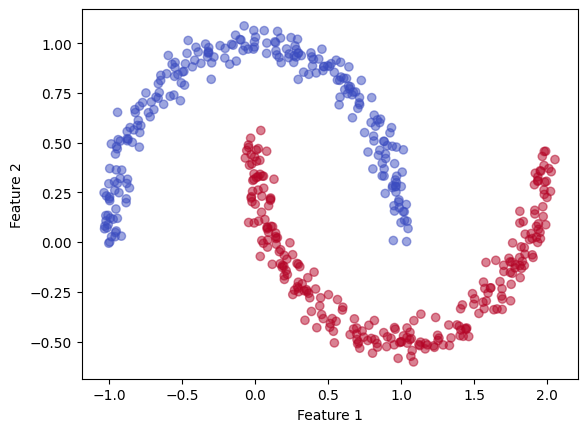

In [550]:
x_train, y_train, x_test, y_test = make_moons(500, 1000)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='coolwarm', alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [569]:
def make_digits():
    data = datasets.load_digits()
    x, y = data['images'], data['target']
    return x.shape, y.shape

make_digits()

((1797, 8, 8), (1797,))

In [551]:
class DataLoader(torch.utils.data.DataLoader):

    def __init__(self, dataset, batch_size):
        super().__init__(dataset, batch_size=batch_size, shuffle=True, collate_fn=self.collate_fn)

    def collate_fn(self, batch):
        return jax.tree_util.tree_map(
            lambda x: jnp.asarray(x, dtype=jnp.float32), torch.utils.data.default_collate(batch)
        )

## Animation

In [552]:
def make_gif(traj: np.ndarray, fps: int = 20, figsize: tuple = (5, 5)) -> Image:

    # Consistent DPI
    fig = plt.figure(figsize=figsize)
    dpi = fig.get_dpi()
    plt.close(fig)

    frames = []
    for t in range(traj.shape[1]):

        # Limits
        x = traj[:, t, 0]
        y = traj[:, t, 1]
        x_min, x_max = x.min(), x.max()
        y_min, y_max = y.min(), y.max()
        pad_x = (x_max - x_min) * 0.01
        pad_y = (y_max - y_min) * 0.01

        # Plots
        fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
        ax.scatter(x, y, alpha=0.7)
        ax.set_xlim(x_min - pad_x, x_max + pad_x)
        ax.set_ylim(y_min - pad_y, y_max + pad_y)
        ax.set_aspect('equal')
        ax.axis('off')

        # Render
        fig.canvas.draw()
        buf_arr = np.frombuffer(fig.canvas.buffer_rgba(), dtype=np.uint8)
        h, w = fig.canvas.get_width_height()
        frame = buf_arr.reshape((h, w, 4))[:, :, :3]  # drop alpha
        frames.append(frame)
        plt.close(fig)

    # Append extra copies of the last frame for pause
    last = frames[-1]
    frames.extend([last] * 100)

    # Write frames
    gif_buf = io.BytesIO()
    with imageio.get_writer(gif_buf, mode='I', format='GIF', fps=fps, loop=0) as writer:
        for frame in frames:
            writer.append_data(frame)
    gif_buf.seek(0)
    return Image(data=gif_buf.read(), format='gif')

## General API

Here we propose a simple API that has all the things a user of a generative model would want.

In [553]:
T = TypeVar('T', bound=nnx.Module)
class Generator(Generic[T], abc.ABC):

    '''
    Abstract base class for a generator module in JAX/Flax.

    Key methods:
        - `__call__`: Generates a batch of samples.
        - `fit`: Fits the generator to training data.
    '''

    def __init__(self, module: T):
        self.module = module # E.g. vector field or flow map

    def __call__(self, n_samples: int, n_times: int, key: jax.Array) -> jax.Array:
        '''
        Generates a batch of samples from the generator.

        Args:
            n_samples (int): Number of samples to generate.
            n_times (int): Number of time steps for each sample.
            key (jax.Array): JAX random key for reproducibility.

        Returns:
            jax.Array: Generated samples of shape (n_samples, n_times, feature_dim).
        '''
        return self.flows(self.flow, self.module, n_samples, n_times, key)
    
    @staticmethod
    @partial(nnx.jit, static_argnames=('flow_fn', 'n_samples', 'n_times'))
    def flows(
        flow_fn: Callable[[T, int, jax.Array], jax.Array], module: T, 
        n_samples: int, n_times: int, key: jax.Array
    ) -> jax.Array:
        keys = jax.random.split(key, n_samples)
        xts = jax.vmap(flow_fn, in_axes=(None, None, 0))(module, n_times, keys)
        return xts # (n_samples, n_times, feature_dim)

    @staticmethod
    @abstractmethod
    def flow(module: T, n_times: int, key: jax.Array) -> jax.Array:
        '''
        Generates a single sample from the generator.

        Args:
            module (nnx.Module): The generator module.
            n_times (int): Number of time steps for the sample.
            key (jax.Array): JAX random key for reproducibility.

        Returns:
            jax.Array: Generated sample of shape (n_times, feature_dim).
        '''
        pass

    @abstractmethod
    def test(self, test_loader: DataLoader, key: jax.Array) -> Dict:
        '''
        Tests the generator on the given test set.

        Args:
            test_loader (DataLoader): DataLoader for the test set.
            key (jax.Array): JAX random key for reproducibility.

        Returns:
            Dict: Dictionary containing test metrics.
        '''
        pass

    def fit(
        self, train_loader: DataLoader, val_loader: DataLoader, 
        optimizer: optax.GradientTransformation, n_epochs: int, key: jax.Array
    ) -> Dict:
        '''
        Fits the generator to the training data.

        Args:
            train_loader (DataLoader): DataLoader for the training set.
            val_loader (DataLoader): DataLoader for the validation set.
            optimizer (optax.GradientTransformation): Optimizer for training.
            n_epochs (int): Number of epochs to train.
            key (jax.Array): JAX random key for reproducibility.

        Returns:
            Dict: Dictionary containing training/validation metrics.
        '''

        # Epochs
        opt = nnx.Optimizer(self.module, optimizer)
        metrics = dict(train_loss=[], val_loss=[])
        for _ in (pb := tqdm(range(n_epochs), desc='Training')):

            # Train
            loss, count = 0.0, 0
            for (train_batch,) in train_loader:
                key, train_key = jax.random.split(key)
                loss += self.step(train_batch, self.loss, self.module, opt, train_key, True).item()
                count += 1
            metrics['train_loss'].append(loss / count)

            # Validate
            loss, count = 0.0, 0
            for (test_batch,) in val_loader:
                key, val_key = jax.random.split(key)
                loss += self.step(test_batch, self.loss, self.module, opt, val_key, False).item()
                count += 1
            metrics['val_loss'].append(loss / count)

            # Progress
            pb.set_postfix({'train_loss': metrics['train_loss'][-1], 'val_loss': metrics['val_loss'][-1]})

        return metrics
    
    @staticmethod
    @partial(nnx.jit, static_argnames=('loss_fn', 'train'))
    def step(
        batch: jax.Array, loss_fn: Callable[[T, jax.Array, jax.Array], jax.Array], 
        module: T, opt: nnx.Optimizer, key: jax.Array, train: bool
    ) -> jax.Array:
        if train:
            value, grad = nnx.value_and_grad(lambda module: loss_fn(module, batch, key))(module)
            opt.update(grad)
        else:
            value = loss_fn(module, batch, key)
        return value
    
    @staticmethod
    @abstractmethod
    def loss(module: T, batch: jax.Array, key: jax.Array) -> jax.Array:
        '''
        Computes the loss for the module given a batch of inputs.
        This method is automatically vectorised in other methods.

        Args:
            module (nnx.Module): The module to compute the loss for.
            x1 (jax.Array): Input data of shape (batch_size, n_feats).
            key (jax.Array): JAX random key for reproducibility.

        Returns:
            jax.Array: Computed loss value ().
        '''
        pass

## Flow matching

In the following code, we will assume that our prior distribution is always the standard normal distribution 
$$
p(\pmb{x}, 0) = \mathcal{N}(\pmb{x} \mid \pmb{0}, \pmb{I}).
$$

In [557]:
class VectorField(ABC, nnx.Module):

    def __init__(self, n_feats: int):
        self.n_feats = n_feats

    @abstractmethod
    def __call__(self, x: jax.Array, t: jax.Array) -> jax.Array:
        '''
        Computes the vector field.

        Args:
            x (jax.Array): Input data of shape (n_feats,).
            t (jax.Array): Time [0, 1].

        Returns:
            jax.Array: Flow map output of shape (n_feats,).
        '''
        pass

In [558]:
class FlowMatching(Generator[VectorField]):

    @staticmethod
    def flow(module: VectorField, n_times: int, key: jax.Array) -> jax.Array:
        t_grid = jnp.linspace(0.0, 1.0, n_times)
        x0 = jax.random.normal(key, (module.n_feats,))
        xts = odeint(module, x0, t_grid)
        return xts # (n_times, n_feats)

    def test(self, test_loader: DataLoader, key: jax.Array, *, n_times: int = 100, n_div_samples: int = 50) -> Dict:
        metrics = dict()
        value, count = 0.0, 0
        for (batch,) in test_loader:
            value += self.nll(self.module, batch, n_times, n_div_samples, key).mean().item()
            count += 1
        metrics['nll'] = value / count
        return metrics
    
    @staticmethod
    @partial(nnx.jit, static_argnames=('n_times', 'n_div_samples'))
    def nll(
        module: VectorField, x1s: jax.Array,
        n_times: int, n_div_samples: int, key: jax.Array
    ) -> jax.Array:

        '''
        Computes the negative log-likelihood for a batch of samples.
        Args:
            vector (Vector): The vector model.
            x1s (jax.Array): Input data of shape (n_samples, n_feats).
            n_times (int): Number of time steps for the ODE integration.
            n_div_samples (int): Number of samples for the divergence estimation.
            key (jax.Array): JAX random key for reproducibility.
        Returns:
            jax.Array: Negative log-likelihood values of shape (n_samples,).
        '''

        def _div(x: jax.Array, t: jax.Array, key: jax.Array) -> jax.Array:
            z = jax.random.normal(key, shape=x.shape)
            _, jvp = jax.jvp(lambda x_: module(x_, t), (x,), (z,))
            dot = jnp.vdot(z, jvp)
            return dot
        
        def div(x: jax.Array, t: jax.Array, key: jax.Array) -> jax.Array:
            keys = jax.random.split(key, n_div_samples)
            div = jax.vmap(lambda key: _div(x, t, key))(keys).mean()
            return div
        
        def rhs(fg: jax.Array, t: jax.Array, key: jax.Array) -> jax.Array:
            f = fg[:-1]
            df = - module(f, 1.0 - t)
            dg = div(f, 1.0 - t, key)
            dfg = jnp.array([*df, dg])
            return dfg

        def _likelihood(x1: jax.Array, key: jax.Array) -> jax.Array:
            f0g0 = jnp.array([*x1, 0.0])
            _rhs = lambda fg, t: rhs(fg, t, key)
            t_grid = jnp.linspace(0.0, 1.0, n_times)
            traj = odeint(_rhs, f0g0, t_grid) # (t_grid, n_feats)
            f1 = traj[-1, :-1]
            g1 = traj[-1, -1]
            logp0 = -0.5 * (jnp.sum(jnp.square(f1)) + f1.shape[0] * jnp.log(2 * jnp.pi))
            logp1 = logp0 - g1
            nll = -logp1
            return nll

        keys = jax.random.split(key, x1s.shape[0])
        nlls = jax.vmap(_likelihood, in_axes=(0, 0))(x1s, keys)
        return nlls # (n_samples,)
    

In [559]:
class MLP(VectorField):

    def __init__(self, n_feats: int, hidden: List[int], time_dim: int, activation: Callable, rngs: nnx.Rngs):
        super().__init__(n_feats)

        # Temporal
        self.time_dim = (time_dim // 2) * 2
        self.proj = nnx.Linear(self.time_dim, self.time_dim, rngs=rngs)

        # Spatio-temporal
        layers = []
        layers.append(nnx.Linear(n_feats + self.time_dim, hidden[0], rngs=rngs))
        layers.append(activation)
        for i in range(len(hidden) - 1):
            layers.append(nnx.Linear(hidden[i], hidden[i+1], rngs=rngs))
            layers.append(activation)
        layers.append(nnx.Linear(hidden[-1], self.n_feats, rngs=rngs))
        self.module = nnx.Sequential(*layers)

    def time_embedding(self, t: jax.Array):
        half = self.time_dim // 2
        exp = jnp.arange(half) / (half - 1)
        freqs = 10000.0 ** (-exp)
        ang = 2 * jnp.pi * freqs * t
        fourier = jnp.concatenate([jnp.sin(ang), jnp.cos(ang)], axis=-1)
        return nnx.gelu(self.proj(fourier))

    def __call__(self, x: jax.Array, t: jax.Array) -> jax.Array:
        emb = self.time_embedding(t)
        return self.module(jnp.concatenate([x, emb], axis=-1))

### Optimal Transport

If we let the conditional flow map be a straight line
$$
\pmb{\phi}(\pmb{x}_0, t \mid \pmb{x}_1) = (1 - t) \pmb{x}_0 + t \pmb{x}_1
$$
then the conditional vector field is the time derrivative
$$
\pmb{v}(\pmb{x}, t \mid \pmb{x}_1) = \frac{\pmb{x}_1 - \pmb{x}}{1 - t}.
$$
Assuming $\pmb{x}_0 \sim \mathcal{N}(\pmb{0}, \pmb{I})$, the statistic of a linear time-invariant SDE tell use the conditional probability path
$$
p(\pmb{x}, t \mid \pmb{x}_1) = \mathcal{N}\left(\pmb{x} \mid t \pmb{x}_1, (1 - t)^2 \pmb{I}\right)
$$
then the generating conditional vector field is

A squared norm Bregman divergence function gives us
$$
\mathcal{L}(\theta) = \mathbb{E}_{t \sim U[0, 1], \pmb{x}_0 \sim \mathcal{N}(\pmb{0}, \pmb{I}), \pmb{x}_1 \sim q} \lVert \pmb{u}(\pmb{x}, t, \theta) - (\pmb{x}_1 - \pmb{x}_0) \rVert^2 
$$

In [560]:
class OptimalTransport(FlowMatching):

    @staticmethod
    def loss(module: VectorField, batch: jax.Array, key: jax.Array) -> jax.Array:

        # Single loss
        def f(x1: jax.Array, key: jax.Array) -> jax.Array:
            kt, kx0 = jax.random.split(key)
            t = jax.random.uniform(kt)
            x0 = jax.random.normal(kx0, shape=x1.shape)
            xt = (1 - t) * x0 + t * x1
            vt = x1 - x0
            vthat = module(xt, t)
            loss = jnp.mean(jnp.square(vthat - vt))
            return loss
        
        # Batch loss
        key_batch = jax.random.split(key, batch.shape[0])
        l = jax.vmap(f, in_axes=(0, 0))(batch, key_batch).mean()
        return l

In [561]:
# Dataset
x_train, y_train, x_test, y_test = make_moons(1000, 500)
dataset = torch.utils.data.TensorDataset(torch.tensor(x_train))
train_loader = DataLoader(torch.utils.data.TensorDataset(torch.tensor(x_train)), 500)
val_loader = DataLoader(torch.utils.data.TensorDataset(torch.tensor(x_test)), 500)

Training: 100%|██████████| 1000/1000 [00:23<00:00, 42.06it/s, train_loss=1.02, val_loss=0.89] 


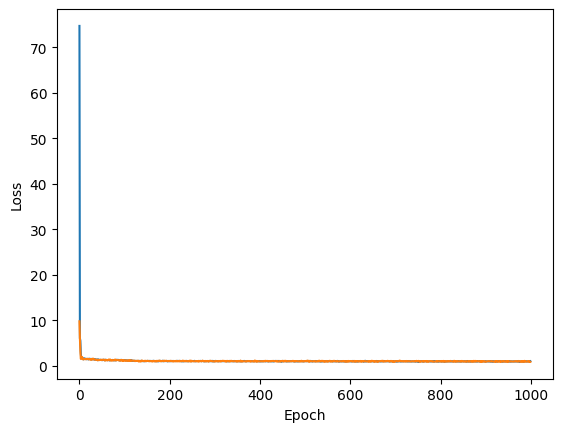

In [562]:
# Model
model = OptimalTransport(MLP(2, [200, 200, 200], 50, nnx.softplus, nnx.Rngs(0)))
metrics = model.fit(train_loader, val_loader, optax.adam(1e-2), 1000, jax.random.PRNGKey(0))
plt.plot(metrics['train_loss'])
plt.plot(metrics['val_loss'])
# plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

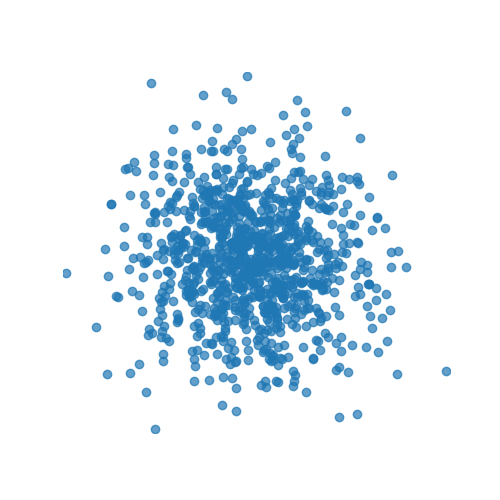

In [545]:
traj = model(1000, 100, jax.random.PRNGKey(0))
make_gif(traj, fps=32)

## Stable Vector Field

Suppose we let the conditional vector field be
$$
\pmb{v}(\pmb{x}, t \mid \pmb{x}_1) = \pmb{x}_1 - \pmb{x}.
$$

Using Bayes rule
$$
p(\pmb{x}_1 \mid \pmb{x}, t) = \frac{p(\pmb{x}, t \mid \pmb{x}_1) q(\pmb{x}_1)}{p(\pmb{x}, t)}
$$
we can simplify the marginal vector field to
$$
\begin{aligned}
    \pmb{v}(\pmb{x}, t) &= \frac{1}{p(\pmb{x}, t)} \int_\mathcal{X} \pmb{v}(\pmb{x}, t \mid \pmb{x}_1) p(\pmb{x}, t \mid \pmb{x}_1) q(\pmb{x}_1) \mathrm{d}\pmb{x}_1 \\
    &= \int_\mathcal{X} \pmb{v}(\pmb{x}, t \mid \pmb{x}_1) p(\pmb{x}_1 \mid \pmb{x}, t) \mathrm{d}\pmb{x}_1 \\
    &= \int_\mathcal{X} (\pmb{x}_1 - \pmb{x}) p(\pmb{x}_1 \mid \pmb{x}, t) \mathrm{d}\pmb{x}_1 \\
    &= \mathbb{E}[\pmb{x}_1 \mid \pmb{x}, t] - \pmb{x}.
\end{aligned}
$$

And we know that
$$
\begin{aligned}
    \mathbb{E}[\pmb{x}_1 \mid \pmb{x}, t] &= \int_\mathcal{X} \pmb{x}_1 p(\pmb{x}_1 \mid \pmb{x}, t) \mathrm{d}\pmb{x}_1 \\
    &= \frac{\int_\mathcal{X} \pmb{x}_1 p(\pmb{x}, t \mid \pmb{x}_1) q(\pmb{x}_1) \mathrm{d}\pmb{x}_1}{\int_\mathcal{X} p(\pmb{x}, t \mid \pmb{x}_1) q(\pmb{x}_1)\mathrm{d}\pmb{x}_1} 
\end{aligned}
$$
where
$$
p(\pmb{x}, t \mid \pmb{x}_1) = \mathcal{N}(\pmb{x} \mid (1 - e^{-t}) \pmb{x}_1, e^{-2t} \pmb{I})
$$

We also know that for $t \in \{0, \infty\}$
$$
\mathbb{E}[\pmb{x}_1 \mid \pmb{x}, t] = \mathbb{E}[\pmb{x}_1 \mid \mathbb{E}[\pmb{x}_1 \mid \pmb{x}, t] , t] 
$$
and 
$$
\mathbb{E}[\pmb{x}_1 \mid \pmb{x}, 0] = \mathbb{E}[\pmb{x}_1], \quad \mathbb{E}[\pmb{x}_1 \mid \pmb{x}, \infty] = \pmb{x}
$$

In [26]:
class DenoiserMLP(MLP):
    
    def denoiser(self, x: jax.Array, t: jax.Array) -> jax.Array:
        emb = self.time_embedding(t)
        x1hat = self.module(jnp.concatenate([x, emb], axis=-1))
        return x1hat

    def __call__(self, x: jax.Array, t: jax.Array) -> jax.Array:
        x1hat = self.denoiser(x, t)
        v = x1hat - x
        return v
    
class Idempotent(FM):

    @staticmethod
    def loss(vector_field: DenoiserMLP, x1: jax.Array, key: jax.Array) -> jax.Array:

        # Standard flow matching loss
        kt, kx0 = jax.random.split(key)
        t = jax.random.uniform(kt)
        x0 = jax.random.normal(kx0, shape=x1.shape)
        xt = (1 - t) * x0 + t * x1
        vt = x1 - x0
        vthat = vector_field(xt, t)
        loss_fm = jnp.mean(jnp.square(vthat - vt))

        # Idempotence t=0
        x1_xt = jax.lax.stop_gradient(vector_field.denoiser(xt, jnp.array(0.0)))
        x1_xt_h = vector_field.denoiser(x1_xt, jnp.array(0.0))
        loss_idem_0 = jnp.mean(jnp.square(x1_xt_h - x1_xt))

        # Idempotence t=1
        x1_xt = jax.lax.stop_gradient(vector_field.denoiser(xt, jnp.array(1.0)))
        x1_xt_h = vector_field.denoiser(x1_xt, jnp.array(1.0))
        loss_idem_1 = jnp.mean(jnp.square(x1_xt_h - x1_xt))

        return loss_fm + loss_idem_0 + loss_idem_1

Training: 100%|██████████| 2500/2500 [01:08<00:00, 36.36it/s, train_loss=0.993, test_loss=0.886]


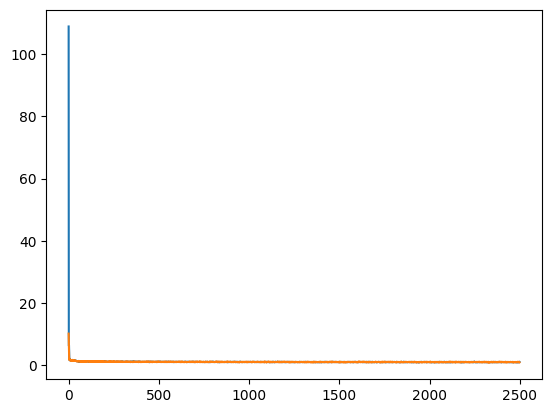

In [27]:
# Dataset
x_train, y_train, x_test, y_test = make_moons(1000, 500)
dataset = torch.utils.data.TensorDataset(torch.tensor(x_train))
train_loader = DataLoader(torch.utils.data.TensorDataset(torch.tensor(x_train)), 500)
val_loader = DataLoader(torch.utils.data.TensorDataset(torch.tensor(x_test)), 500)

# Model
model = Idempotent(DenoiserMLP(2, [200, 200, 200], 50, nnx.softplus, nnx.Rngs(0)))
metrics = model.fit(train_loader, val_loader, optax.adamw(1e-2), 2500, jax.random.PRNGKey(0))
plt.plot(metrics['train_loss'])
plt.plot(metrics['val_loss'])
plt.show()

In [28]:
res = model.test(val_loader, jax.random.PRNGKey(0), n_times=100, n_div_samples=100)
res

{'nll': 0.0}

In [ ]:
traj = model(1000, 100, jax.random.PRNGKey(0))
make_gif(traj, fps=32)

Error: command buffer exited with error status.
	The Metal Performance Shaders operations encoded on it may not have completed.
	Error: 
	(null)
	Caused GPU Timeout Error (00000002:kIOGPUCommandBufferCallbackErrorTimeout)
	<AGXG15XFamilyCommandBuffer: 0x3874639b0>
    label = <none> 
    device = <AGXG15SDevice: 0x1370c0c00>
        name = Apple M3 Pro 
    commandQueue = <AGXG15XFamilyCommandQueue: 0x125ee4400>
        label = <none> 
        device = <AGXG15SDevice: 0x1370c0c00>
            name = Apple M3 Pro 
    retainedReferences = 1
Error: command buffer exited with error status.
	The Metal Performance Shaders operations encoded on it may not have completed.
	Error: 
	(null)
	Caused GPU Timeout Error (00000002:kIOGPUCommandBufferCallbackErrorTimeout)
	<AGXG15XFamilyCommandBuffer: 0x38746c7a0>
    label = <none> 
    device = <AGXG15SDevice: 0x1370c0c00>
        name = Apple M3 Pro 
    commandQueue = <AGXG15XFamilyCommandQueue: 0x125ee4400>
        label = <none> 
        device

## Idempotency

Something we know about the denoiser is that it should be idempotent on the boundaries:
$$
\mathbb{E}[\pmb{x}_1 \mid \pmb{x}, 0] = \pmb{x}_1 \quad \mathbb{E}[\pmb{x}_1 \mid \pmb{x}, 1] = \mathbb{E}[\pmb{x}_1 \mid \mathbb{E}[\pmb{x}_1 \mid \pmb{x}, 1], 1]
$$

In [11]:
class Idempotent(FM):

    @staticmethod
    def loss(vector_field: VectorField, x1: jax.Array, key: jax.Array) -> jax.Array:

        # Standard flow matching loss
        kt, kx0 = jax.random.split(key)
        t = jax.random.uniform(kt)
        x0 = jax.random.normal(kx0, shape=x1.shape)
        xt = (1 - t) * x0 + t * x1
        vt = x1 - x0
        vthat = vector_field(xt, t)
        loss_fm = jnp.mean(jnp.square(vthat - vt))

        # Consistency
        xth = vector_field.denoiser(xt, t)
        xthh = vector_field.denoiser(xth, t)
        loss_idem = jnp.mean(jnp.square(xthh - xth))

        return loss_fm + loss_idem


        # # Idempotency
        # xthat = vector_field.denoiser(xt, t)
        # xthathat = vector_field.denoiser(xthat, t)
        # loss_xt = jnp.mean(jnp.square(xthathat - xthat))

        # # Idempotency at t=0
        # x0hat = vector_field.denoiser(xt, 0.0)
        # loss_x0 = jnp.mean(jnp.square(x0hat - jnp.zeros_like(x0)))

        # # Idempotency at t=1
        # x1hat = vector_field.denoiser(xt, 1.0)
        # loss_x1 = jnp.mean(jnp.square(x1hat - xt))
        
        # return loss_fm + loss_x0 + loss_x1 + loss_xt

NameError: name 'FM' is not defined

In [12]:
# Dataset
x_train, y_train, x_test, y_test = make_moons(1000, 500)
dataset = torch.utils.data.TensorDataset(torch.tensor(x_train))
train_loader = DataLoader(torch.utils.data.TensorDataset(torch.tensor(x_train)), 500)
val_loader = DataLoader(torch.utils.data.TensorDataset(torch.tensor(x_test)), 500)

# Model
model = Idempotent(DenoiserMLP(2, [200, 200, 200], 50, nnx.softplus, nnx.Rngs(0)))
metrics = model.fit(train_loader, val_loader, optax.adamw(1e-2), 2500, jax.random.PRNGKey(0))
plt.plot(metrics['train_loss'])
plt.plot(metrics['val_loss'])
plt.show()

NameError: name 'Idempotent' is not defined

In [44]:
res = model.test(val_loader, jax.random.PRNGKey(0))
res

{'nll': 0.0}

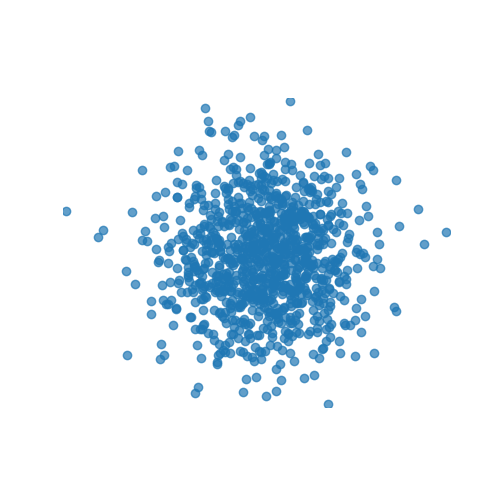

In [45]:
traj = model(1000, 100, jax.random.PRNGKey(0))
make_gif(traj, fps=32)

## Flow Map Matching

Setup
- Assume there exists a probability path $p(x,t)$ that transports us from the prior ($t=0$) to the data distribution ($t=1$). Due to the continuity equation, there exists a vector field $v(x,t)$ that generates $p(x,t)$. Due to the flow equation, there exist a flow map $\phi(x_0, t_0, t_1)$ that is the integral curve of $v(x,t)$.
- Note that $\phi(x_0,t_0, t_1)$ has two time arguments because $v(x,t)$ is time-dependent. Poisson flow generative models discusses why a time variable is needed for interpolation without degeneracy.
- Having $x_1 = \phi(x_0, 0, 1)$ is nice because we can map directly instead of integrating $v(x,t)$.

Firstly, there are three main properties that a flow map must satisfy (cf. Flow Map Matching, Boffi):

1. Identity: $\phi(x, a, b) = x$
2. Inverse: $\phi(\phi(x, a, b), b, a) = x$
3. Semigroup: $\phi(\phi(x, a, b), b, c) = \phi(x, a, c)$

Secondly, we'd like the flow map to:

4. Match the prior distribution: $\phi(x_1, 1, 0) \sim \mathcal{N}(0, I)$ for all $x_1 \sim q$ (dataset).
5. Minimise the transport cost: $\frac{1}{2} \int_0^1 \lVert \frac{\partial}{\partial t} \phi(x_1, 1, t) \rVert^2 \mathrm{d}t$

Approach 1 [Tried, Failed] 
- Generate an anchor trajectory (directly or autoregressively) with $\phi(x_1, 1, t), x_1 \sim q$ over random times $t \sim U[0, 1]$ and enforce (1-5) on those stop-graded states/times.
    - Autoregressive anchor trajectory: $x_t  = \phi(x_1, 1, t), \dots, x_0 = \phi(x_t, t, 0)$.
    - Direct anchor trajectory: $x_t  = \phi(x_1, 1, t), \dots, x_0 = \phi(x_1, 1, 0)$
    - Both approaches result in learning mapping from $N(0, I)$ to single modes of each basin.

Approach 2 [in progress]
- Generate source points $x_0$ from data points $x_1$ with $x_0 = \phi(x_1, 1, 0)$, minimising (4), and then assert ansatz that $\phi(x_0, 0, t) = (1 - t) x_0 + t x_1$ and statisfy (1-3) over those stop-graded state/times for $t \sim U[0, 1]$.
    - Matching the linear interpolation should automatically minimise (5).



NOTE: What we need to is to have flow map predict the point on the prior

Assume there exists a probability path $p(x,t)$ that transports us from the prior ($t=0$) to the data distribution ($t=1$). Due to the continuity equation, there exists a vector field $v(x,t)$ that generates $p(x,t)$. Due to the flow equation, there exist a flow map $\phi(x,t)$ that is the integral curve of $v(x,t)$.

Let's model $\phi(x,t)$. Consider a set of time samples $T \subset [0, 1]$. Define the set of all forward and backward states
$$
\Phi(\pmb{x}, t) = \left\{\left(\pmb{\phi}(\pmb{x}, \tau - t), \tau\right) \mid \tau \in T\right\}.
$$

Initialise a time-indexed set
$$
\Gamma = \left\{(\pmb{x}_1, 1)\right\}
$$
then run the recursion
$$
\Gamma \gets \Gamma \bigcup_{(\pmb{x}, t) \in \Gamma} \Phi(x, t)
$$
for a few iterations (2 is probably sufficient).

Collect the forward and backward states by their time $t \in T$
$$
\Gamma_t = \left\{ \pmb{x} \mid (\pmb{x}, t) \in \Gamma \right\}
$$
and compute their mean and variance
$$
\Gamma^{\mu}_t = \frac{1}{|\Gamma_t|} \sum_{\pmb{x} \in \Gamma_t} \pmb{x}, \qquad 
\Gamma^\Sigma_t = \frac{1}{|\Gamma_t|} \sum_{\pmb{x} \in \Gamma_t} \lVert \pmb{x} - \Gamma^{\mu}_t\rVert^2.
$$

For each data sample $\pmb{x}_1 \sim q$ we want
$$
\mathcal{L}(\theta \mid \mathbf{x}_1)
=
\underbrace{\frac{1}{|T|}\sum_{t\in T}\Gamma^\Sigma_t}_{\substack{\text{Semigroup}\\\text{consistency}}}
\;-\;
\underbrace{\log p\bigl(\Gamma^\mu_0\bigr)}_{\substack{\text{Prior}\\\text{alignment}}}
$$

**Paired Coupling**

If instead of just having $\pmb{x}_1 \sim q$ we have $(\pmb{x}_0, \pmb{x}_1) \sim \pi$, then we can initialise
$$
\Gamma = \left\{(\pmb{x}_0, 0), (\pmb{x}_1, 1)\right\}
$$
run the recursion, and then have
$$
\mathcal{L}(\theta \mid \mathbf{x}_0,\mathbf{x}_1)
=
\underbrace{\frac{1}{|T|}\sum_{t\in T}\Gamma^\Sigma_t}_{\substack{\text{Semigroup}\\\text{consistency}}}
$$


In [66]:
class FlowMap(ABC, nnx.Module):

    '''
    Abstract class for flow map of non-autonomous vector field.
    '''

    def __init__(self, n_feats: int):
        self.n_feats = n_feats

    @abstractmethod
    def __call__(self, x: jax.Array, t0: jax.Array, t1: jax.Array) -> jax.Array:
        '''
        Computes the flow map from time t0 to t1 for input x.

        Args:
            x (jax.Array): Input data of shape (n_feats,).
            t0 (jax.Array): Initial time [0, 1].
            t1 (jax.Array): Final time [0, 1].

        Returns:
            jax.Array: Flow map output of shape (n_feats,).
        '''
        pass

In [67]:
class FlowMapMLP(FlowMap):

    '''
    Flow map for non-autonomous vector field using MLP.
    '''

    def __init__(self, n_feats: int, hidden: List[int], time_dim: int, activation: Callable, rngs: nnx.Rngs):
        super().__init__(n_feats)

        # Temporal
        self.time_dim = (time_dim // 2) * 2
        self.proj = nnx.Linear(self.time_dim, self.time_dim, rngs=rngs)

        # Spatio-temporal
        layers = []
        layers.append(nnx.Linear(n_feats + 2 * self.time_dim, hidden[0], rngs=rngs))
        layers.append(activation)
        for i in range(len(hidden) - 1):
            layers.append(nnx.Linear(hidden[i], hidden[i+1], rngs=rngs))
            layers.append(activation)
        layers.append(nnx.Linear(hidden[-1], self.n_feats, rngs=rngs))
        self.module = nnx.Sequential(*layers)

    def time_embedding(self, t: jax.Array):
        half = self.time_dim // 2
        exp = jnp.arange(half) / (half - 1)
        freqs = 10000.0 ** (-exp)
        ang = 2 * jnp.pi * freqs * t
        fourier = jnp.concatenate([jnp.sin(ang), jnp.cos(ang)], axis=-1)
        return nnx.gelu(self.proj(fourier))

    def __call__(self, x: jax.Array, t0: jax.Array, t1: jax.Array) -> jax.Array:
        emb0 = self.time_embedding(t0)
        emb1 = self.time_embedding(t1)
        return self.module(jnp.concatenate([x, emb0, emb1], axis=-1))

In [288]:
ts = jax.random.uniform(jax.random.PRNGKey(0), (10,))
ts = ts.sort()
jax.random.choice(jax.random.PRNGKey(0), ts, (3, 3), replace=False)

Array([[0.16550303, 0.17101455, 0.947667  ],
       [0.5698887 , 0.68948054, 0.46866846],
       [0.33229148, 0.3101946 , 0.74676657]], dtype=float32)

In [292]:
ts = jax.random.uniform(jax.random.PRNGKey(0), (5,))
ts = ts.sort()
tn = jnp.delete(ts, jnp.argmax(ts == ts[1]))
ts, tn

(Array([0.33229148, 0.46866846, 0.5698887 , 0.947667  , 0.9785799 ],      dtype=float32),
 Array([0.33229148, 0.5698887 , 0.947667  , 0.9785799 ], dtype=float32))

In [296]:
jax.random.choice(jax.random.PRNGKey(0), ts, (2,), replace=False)

Array([0.33229148, 0.46866846], dtype=float32)

In [508]:
class FlowMapMatching(Generator[FlowMap]):

    '''
    Here we assume that vector is a flow map.
    '''

    @staticmethod
    def loss(module: FlowMap, batch: jax.Array, key: jax.Array) -> jax.Array:

        # Keys
        kt, kl, kw = jax.random.split(key, 3)

        # Times
        ts = jax.random.uniform(kt, (3,))
        ts = jnp.concatenate((ts, jnp.array([0.0, 1.0])))
        ts = ts.sort()

        # Trajectory
        def trajectory(x1: jax.Array):
            def f(xt, tt):
                x, t = xt[:-1], xt[-1]
                xtt = jnp.concatenate((
                    module(x, t, tt), jnp.array([tt])
                ))
                return xtt, xtt
            x1 = jnp.concatenate((x1, jnp.array([1.0])))
            tts = jnp.flip(ts, axis=0)[1:]
            _, xts = jax.lax.scan(f, x1, tts)
            xts = jnp.concatenate((x1[None], xts))
            xts = jnp.flip(xts, axis=0)[:, :-1]
            return xts # (n_times, n_feats)
        
        # Adjacent states
        def adjacent(x: jax.Array, t: jax.Array) -> jax.Array:
            x = jax.lax.stop_gradient(x)
            xt = jax.vmap(lambda tt: module(x, t, tt))(ts)
            return xt # (n_times, n_feats)
        
        def loss_identity(x: jax.Array, t: jax.Array) -> jax.Array:
            l = jnp.mean((module(x, t, t) - x)**2)
            return l
        
        def loss_inverse(x: jax.Array, t: jax.Array, tt: jax.Array) -> jax.Array:
            l = jnp.mean((module(module(x, t, tt), tt, t) - x)**2)
            return l
        
        def loss_semigroup(x: jax.Array, t: jax.Array, tt: jax.Array, ttt: jax.Array) -> jax.Array:
            l = jnp.mean((module(module(x, t, tt), tt, ttt) - module(x, t, ttt))**2)
            return l
        
        def loss_transport(x, t):
            _, v = jax.jvp(lambda τ: module(x, t, τ), (t,), (1.0,))
            return 0.5 * jnp.sum(v**2)

        # Consistency loss
        def loss_single(x1: jax.Array, key: jax.Array):

            # Trajectory
            xts = trajectory(x1) # autoregressive
            # xts = adjacent(x1, jnp.array(1.0))[:-1, :]
            # xts = jnp.concatenate((xts, x1[None]))
            xts_det = jax.lax.stop_gradient(xts)
            ts_det = jax.lax.stop_gradient(ts)

            # Losses and state at t=0
            tt, ttt = jax.random.choice(key, ts_det, (2,))
            l = jax.vmap(loss_identity, in_axes=(0, 0))(xts_det, ts_det).mean()
            l += jax.vmap(loss_inverse, in_axes=(0, 0, None))(xts_det, ts_det, tt).mean()
            l += jax.vmap(loss_semigroup, in_axes=(0, 0, None, None))(xts_det, ts_det, tt, ttt).mean()
            l += jax.vmap(loss_transport, in_axes=(0, 0))(xts_det, ts_det).mean()
            t0, t1 = jnp.array(0.0), jnp.array(1.0)
            l += jnp.mean((module(module(x1, t1, t0), t0, t1) - x1)**2)
            x0 = xts[0, :]
            return l, x0
        
        # Wassertein loss
        def wasserstein(x0s: jax.Array, key: jax.Array):
            b, d = x0s.shape
            ky, kp = jax.random.split(key)
            y = jax.random.normal(ky, (b, d))
            p = jax.random.normal(kp, (20, d))
            def w(proj):
                alpha = jnp.sort(x0s @ proj)
                beta = jnp.sort(y @ proj)
                return jnp.mean((alpha - beta)**2)
            mmds = jax.vmap(w)(p)
            return jnp.mean(mmds)
        
        kls = jax.random.split(kl, batch.shape[0])
        ls, x0s = jax.vmap(loss_single, in_axes=(0, 0))(batch, kls)
        l = ls.mean()
        l += wasserstein(x0s, kw)
        return l
    
    def test(self, test_loader: DataLoader, key: jax.Array):
        raise NotImplementedError()

    @staticmethod
    def flow(module: FlowMap, n_times: int, key: jax.Array) -> jax.Array:

        # Initial state and time step size
        x = jax.random.normal(key, (module.n_feats,))
        dt = jnp.array(1.0 / (n_times - 1))

        # Iterate flow map
        def f(xt, _):
            x, t = xt[:-1], xt[-1]
            tau = t + dt
            x = module(x, t, tau)
            xt = jnp.array([*x, tau])
            return xt, xt
        xt = jnp.array([*x, 0.0])
        _, xts = jax.lax.scan(f, xt, None, length=n_times - 1)
        xts = jnp.vstack((jnp.array([*x, 0.0]), xts))  # Add initial state
        return xts[:, :-1]
    
model = FlowMapMatching(FlowMapMLP(2, [500, 500, 500], 50, nnx.softplus, nnx.Rngs(0)))
x_train, _, _, _ = make_moons(10, 10)
x_train = jnp.array(x_train)
model.loss(model.module, x_train, jax.random.PRNGKey(0))

Array(2.743168, dtype=float32)

In [509]:
# Dataset
x_train, y_train, x_test, y_test = make_moons(1000, 500)
dataset = torch.utils.data.TensorDataset(torch.tensor(x_train))
train_loader = DataLoader(torch.utils.data.TensorDataset(torch.tensor(x_train)), 500)
val_loader = DataLoader(torch.utils.data.TensorDataset(torch.tensor(x_test)), 500)

# Model
model = FlowMapMatching(FlowMapMLP(2, [200, 200, 200], 50, nnx.softplus, nnx.Rngs(0)))
tx = optax.chain(
    # optax.clip_by_global_norm(1.0), 
    optax.adamw(1e-3)
)
metrics = model.fit(train_loader, val_loader, tx, 1500, jax.random.PRNGKey(0))

Training: 100%|██████████| 1500/1500 [01:55<00:00, 12.98it/s, train_loss=0.254, val_loss=0.194] 


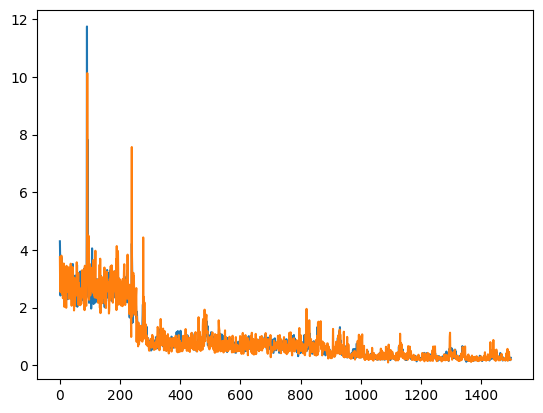

In [516]:
plt.plot(metrics['train_loss'])
plt.plot(metrics['val_loss'])
# plt.yscale('log')
# plt.ylim(0, 1000)
plt.show()

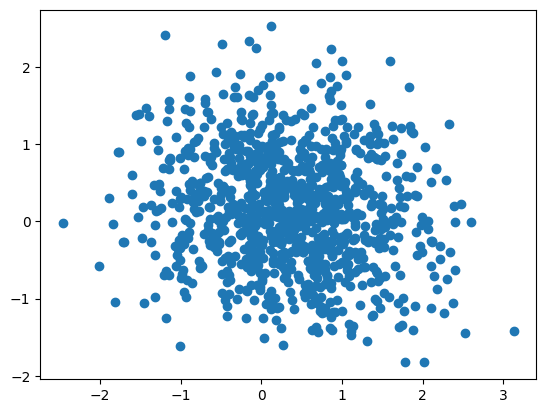

In [517]:
f = lambda k: model.module(jax.random.normal(k, (2,)), jnp.array(0.0), jnp.array(1.0))
g = jax.vmap(f)(jax.random.split(jax.random.PRNGKey(0), 1000))
plt.scatter(g[:, 0], g[:,1])
plt.show()

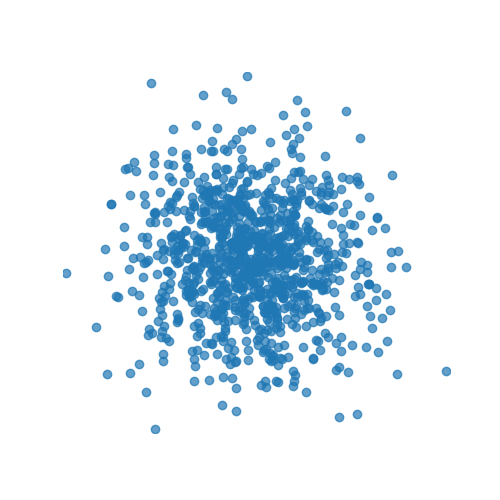

In [520]:
traj = model(1000, 100, jax.random.PRNGKey(0))
make_gif(traj, fps=32)